<a href="https://colab.research.google.com/github/swathii03/LAB_2/blob/main/21mia1116_02_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [ ]:
# Load the image from the provided path
image_path = "/content/images.jpeg"
image1 = cv2.imread(image_path)

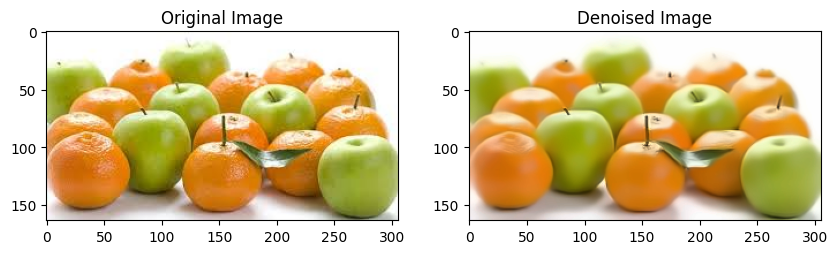

In [ ]:
# Denoise the image
dst = cv2.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 15)

# Plotting the original and denoised image
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image')
plt.show()

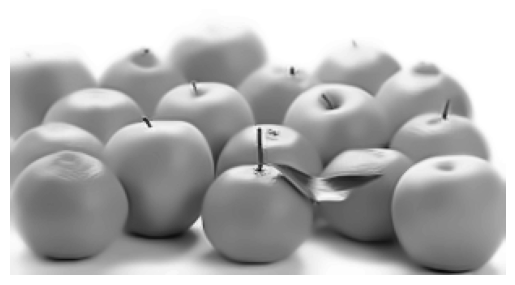

In [ ]:
# Convert the denoised image to RGB and then to grayscale
img1 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Apply Otsu's thresholding
ret, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

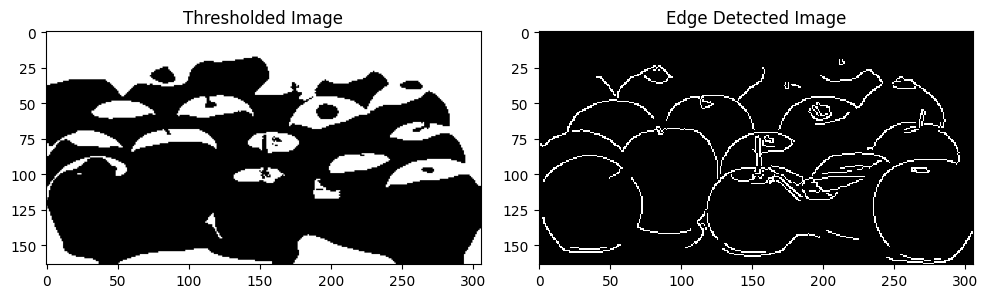

In [ ]:
# Edge detection using Canny
edge = cv2.Canny(img, 100, 200)

# Display the thresholded image
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(thresh1, cmap='gray')
plt.title('Thresholded Image')

# Display the edge-detected image
plt.subplot(122), io.imshow(edge)
plt.title('Edge Detected Image')
plt.show()

In [ ]:
# Find contours
contours, _ = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Initialize lists to hold features
areas = []
perimeters = []
bounding_boxes = []
centroids = []
colors = []
histograms = []

# Loop through each contour to extract features
for cnt in contours:
    # Calculate area and perimeter
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    # Get bounding box
    x, y, w, h = cv2.boundingRect(cnt)
    bounding_box = (x, y, w, h)

    # Get centroid
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0
    centroid = (cx, cy)

    # Extract the region of interest for color analysis
    roi = img1[y:y+h, x:x+w]

    # Compute the mean color of the object
    mean_color = cv2.mean(roi)[:3]  # Ignore alpha channel if present

    # Calculate the color histogram for each channel
    hist_r = cv2.calcHist([roi], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([roi], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([roi], [2], None, [256], [0, 256])
    histograms.append((hist_r, hist_g, hist_b))

    # Append the features to lists
    areas.append(area)
    perimeters.append(perimeter)
    bounding_boxes.append(bounding_box)
    centroids.append(centroid)
    colors.append(mean_color)

    # Draw the bounding box and centroid on the image
    cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.circle(img1, (cx, cy), 5, (255, 0, 0), -1)

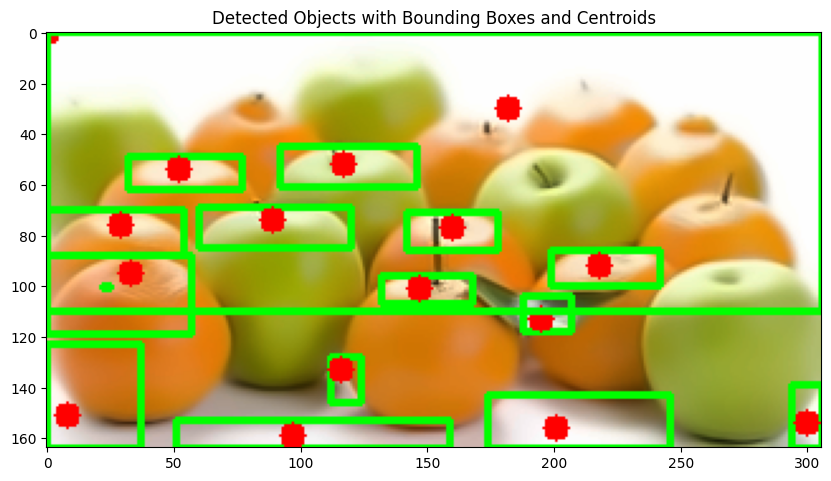

In [ ]:
# Display the image with bounding boxes and centroids
plt.figure(figsize=(10, 10))
plt.imshow(img1)
plt.title("Detected Objects with Bounding Boxes and Centroids")
plt.show()

Object 1:
  Area: 572.5
  Perimeter: 222.87005710601807
  Bounding Box: (51, 153, 108, 11)
  Centroid: (97, 159)
  Mean Color (R, G, B): (149.45286195286195, 194.2104377104377, 116.27946127946127)


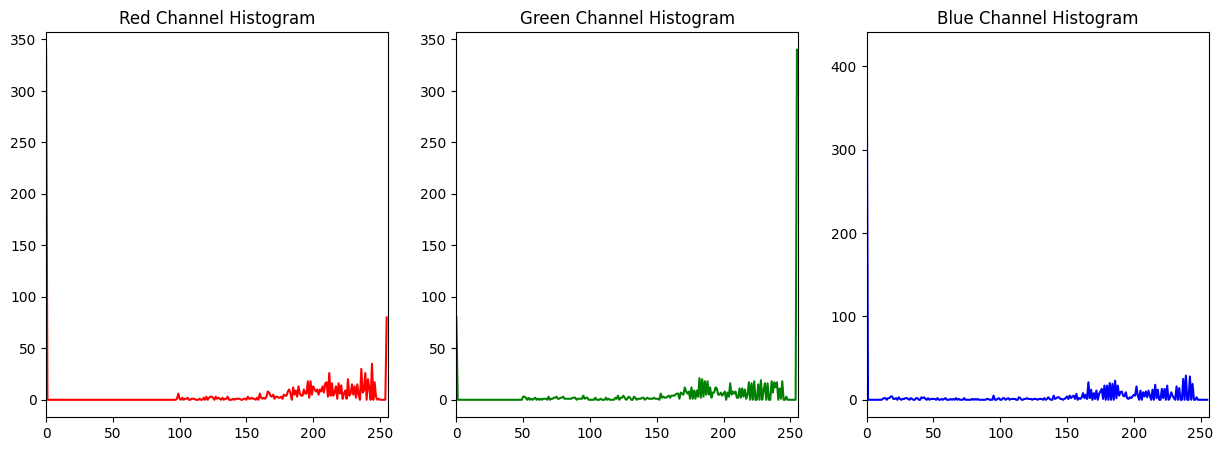


Object 2:
  Area: 763.0
  Perimeter: 166.42640602588654
  Bounding Box: (174, 143, 72, 21)
  Centroid: (201, 156)
  Mean Color (R, G, B): (167.2956349206349, 188.3095238095238, 132.25925925925924)


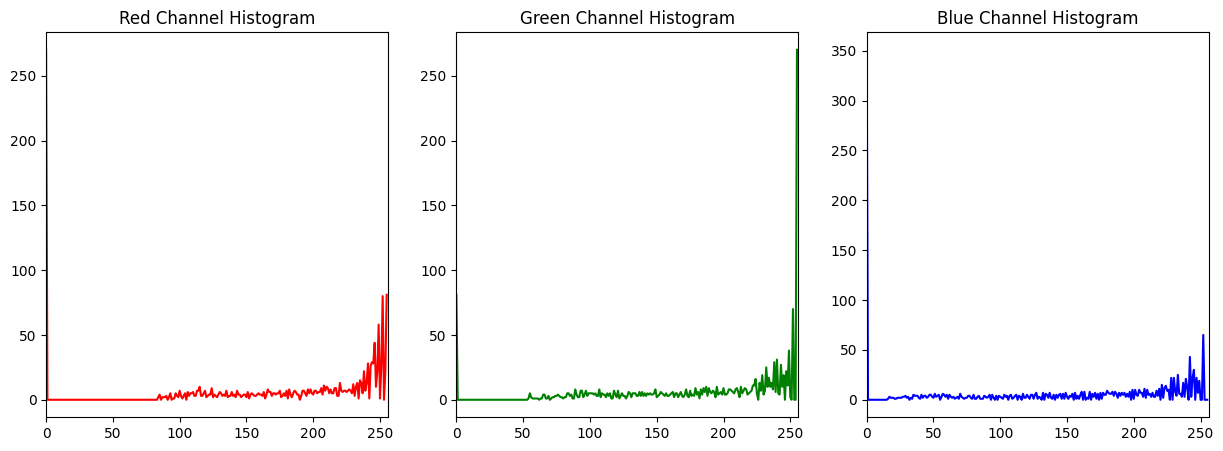


Object 3:
  Area: 164.5
  Perimeter: 63.55634891986847
  Bounding Box: (294, 139, 12, 25)
  Centroid: (300, 154)
  Mean Color (R, G, B): (148.65666666666667, 167.40333333333334, 67.05666666666667)


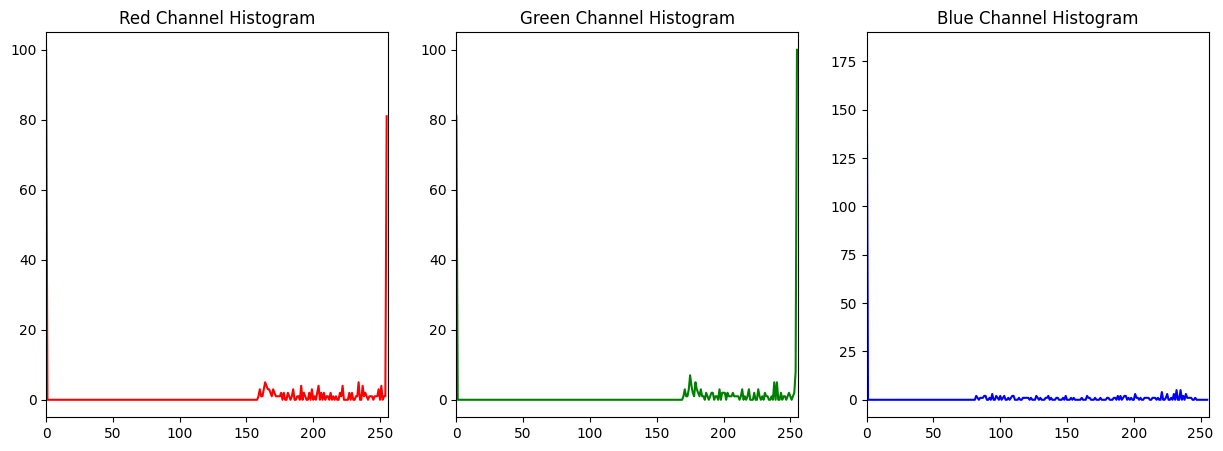


Object 4:
  Area: 30.0
  Perimeter: 45.455843567848206
  Bounding Box: (112, 128, 12, 18)
  Centroid: (116, 133)
  Mean Color (R, G, B): (160.88425925925924, 121.27314814814814, 37.18981481481481)


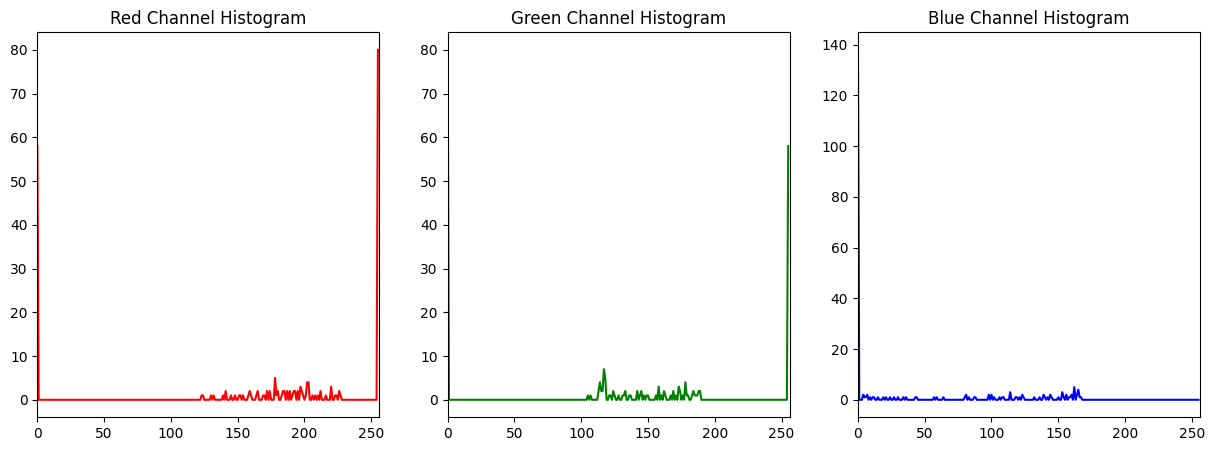


Object 5:
  Area: 403.0
  Perimeter: 140.28427076339722
  Bounding Box: (0, 123, 37, 41)
  Centroid: (8, 151)
  Mean Color (R, G, B): (176.2050098879367, 150.65589980224127, 69.83058668424522)


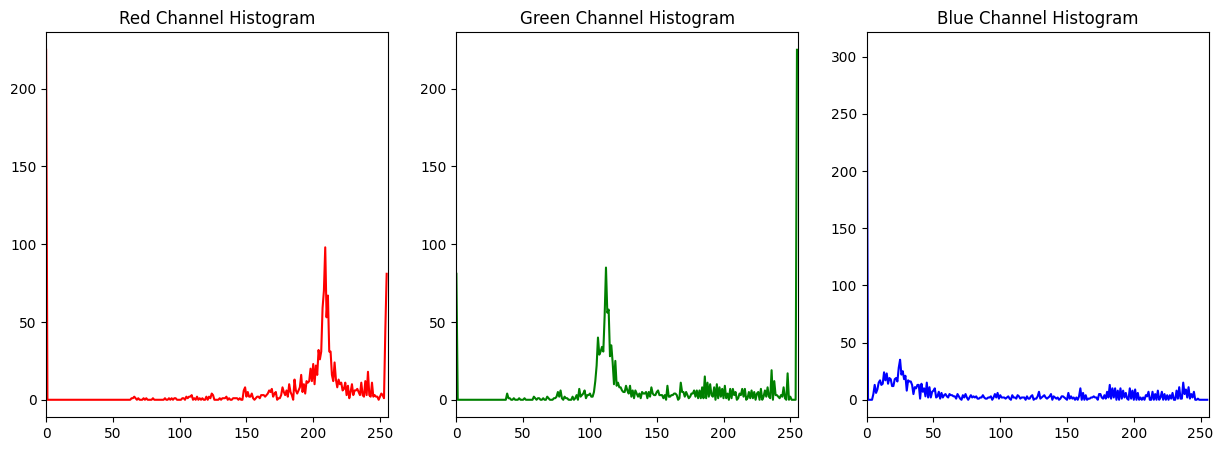


Object 6:
  Area: 113.0
  Perimeter: 62.62741661071777
  Bounding Box: (188, 104, 19, 14)
  Centroid: (195, 113)
  Mean Color (R, G, B): (99.96616541353383, 175.93984962406014, 43.1390977443609)


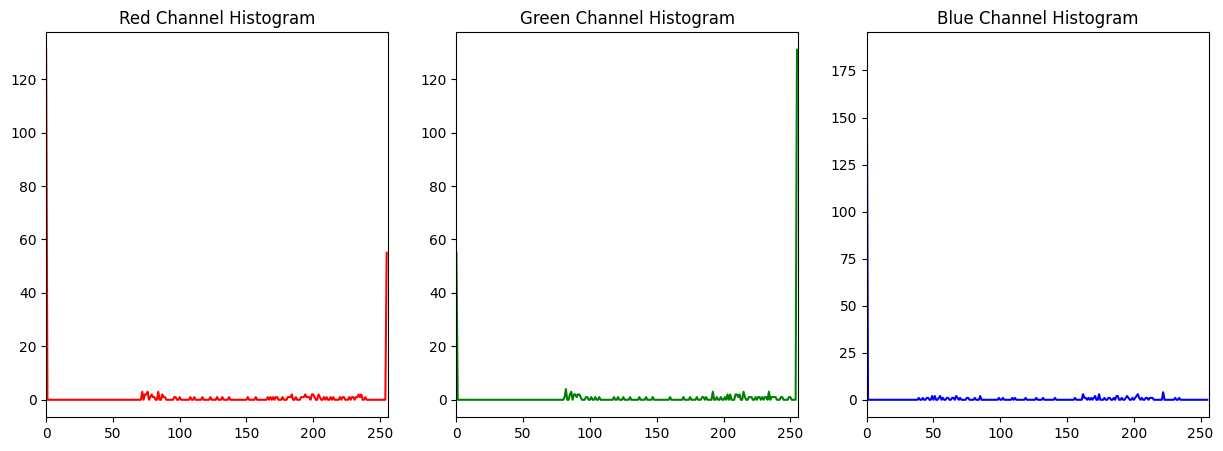


Object 7:
  Area: 0.0
  Perimeter: 4.0
  Bounding Box: (22, 100, 3, 1)
  Centroid: (0, 0)
  Mean Color (R, G, B): (0.0, 255.0, 0.0)


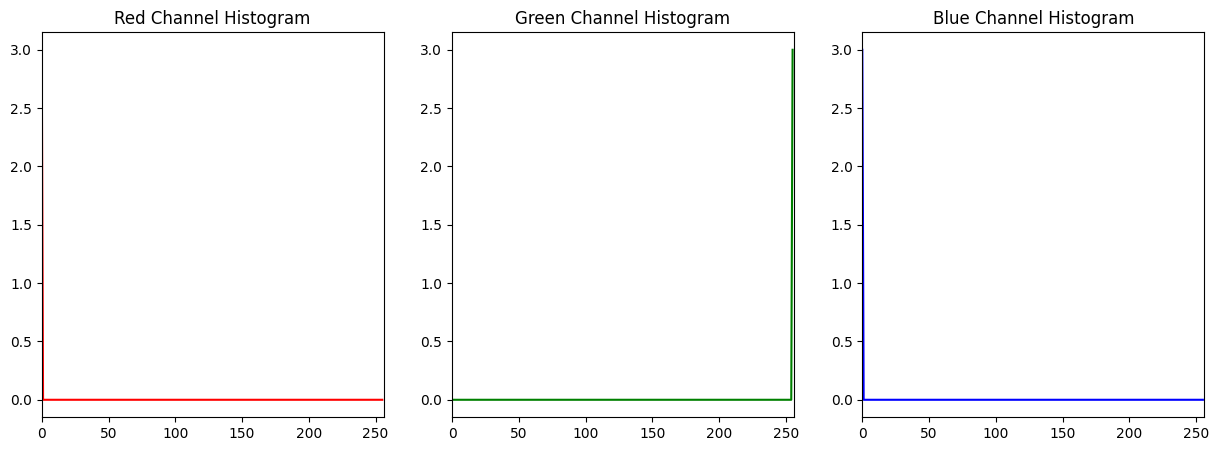


Object 8:
  Area: 195.5
  Perimeter: 110.32590079307556
  Bounding Box: (132, 96, 36, 11)
  Centroid: (147, 101)
  Mean Color (R, G, B): (160.78535353535355, 172.53030303030303, 68.71969696969697)


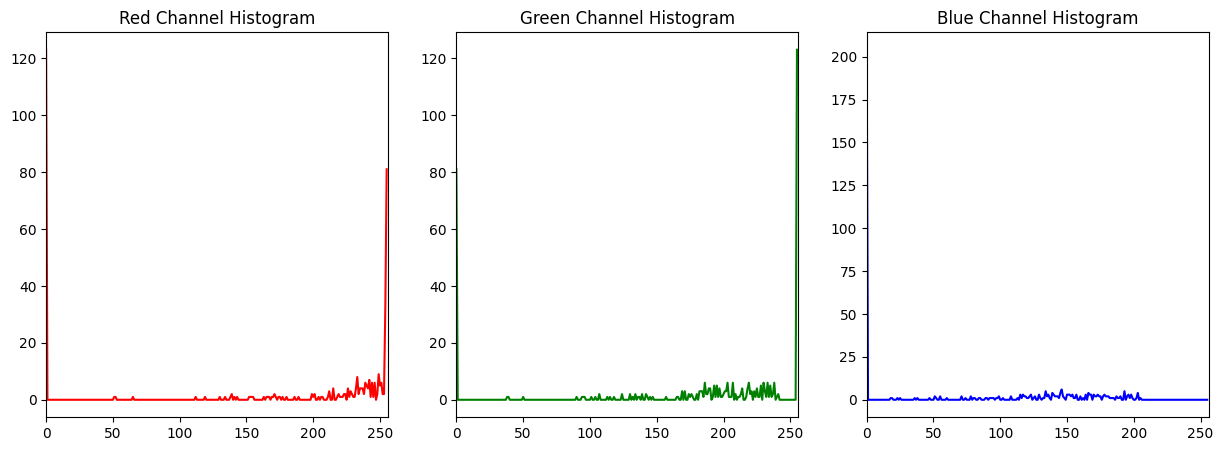


Object 9:
  Area: 148.5
  Perimeter: 165.4385986328125
  Bounding Box: (0, 88, 57, 31)
  Centroid: (33, 95)
  Mean Color (R, G, B): (170.87209960384834, 165.21448783248445, 50.94736842105264)


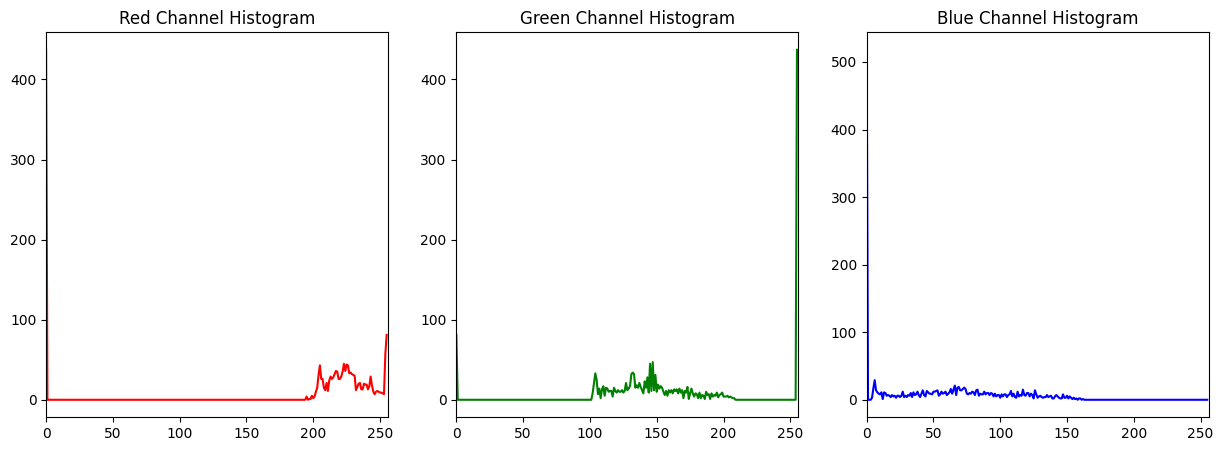


Object 10:
  Area: 363.0
  Perimeter: 101.94112479686737
  Bounding Box: (199, 86, 43, 14)
  Centroid: (218, 92)
  Mean Color (R, G, B): (177.65448504983388, 186.59800664451828, 82.3405315614618)


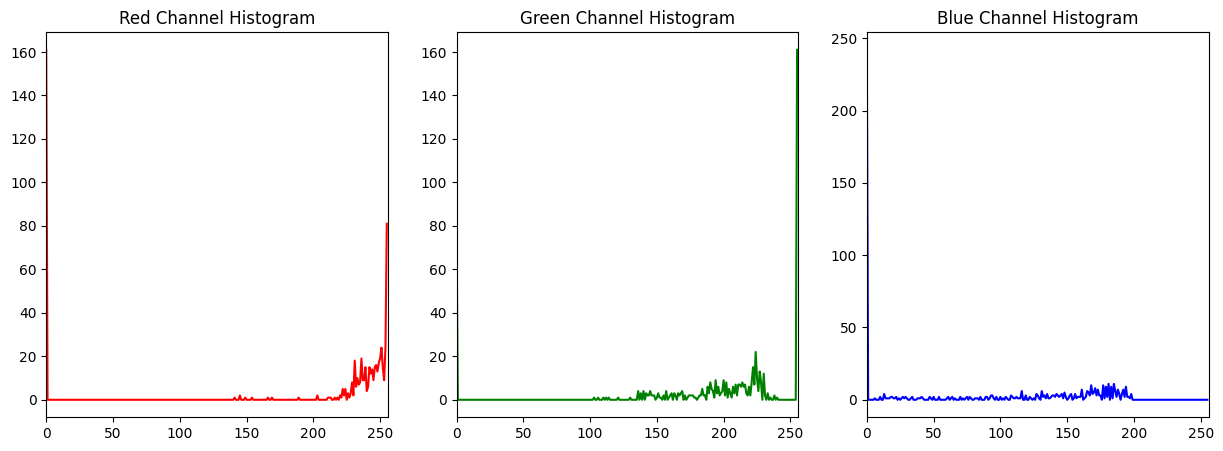


Object 11:
  Area: 312.0
  Perimeter: 105.59797894954681
  Bounding Box: (142, 71, 36, 15)
  Centroid: (160, 77)
  Mean Color (R, G, B): (173.0, 182.90740740740742, 88.64074074074074)


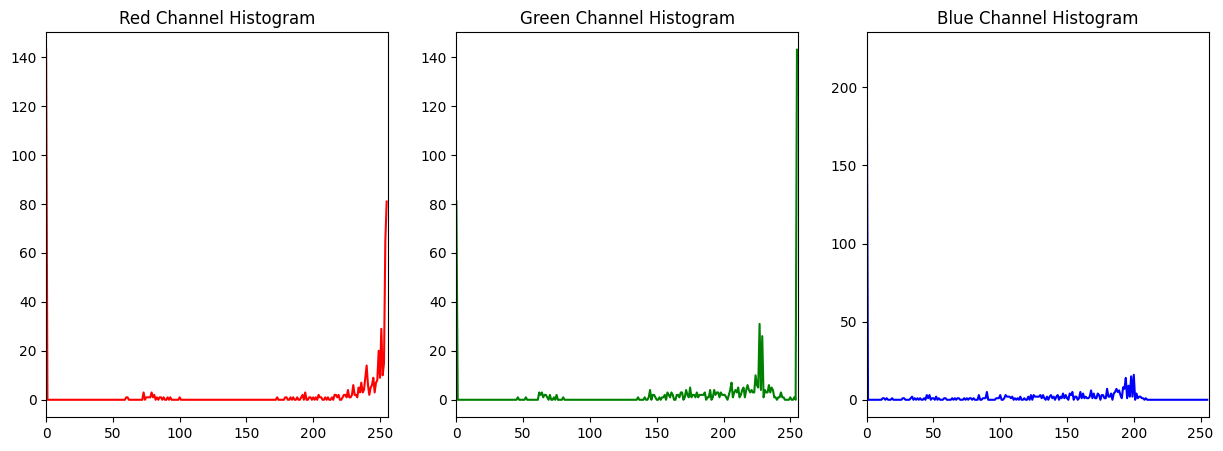


Object 12:
  Area: 307.5
  Perimeter: 133.98275518417358
  Bounding Box: (0, 70, 54, 18)
  Centroid: (29, 76)
  Mean Color (R, G, B): (182.80658436213994, 177.31893004115227, 68.36625514403293)


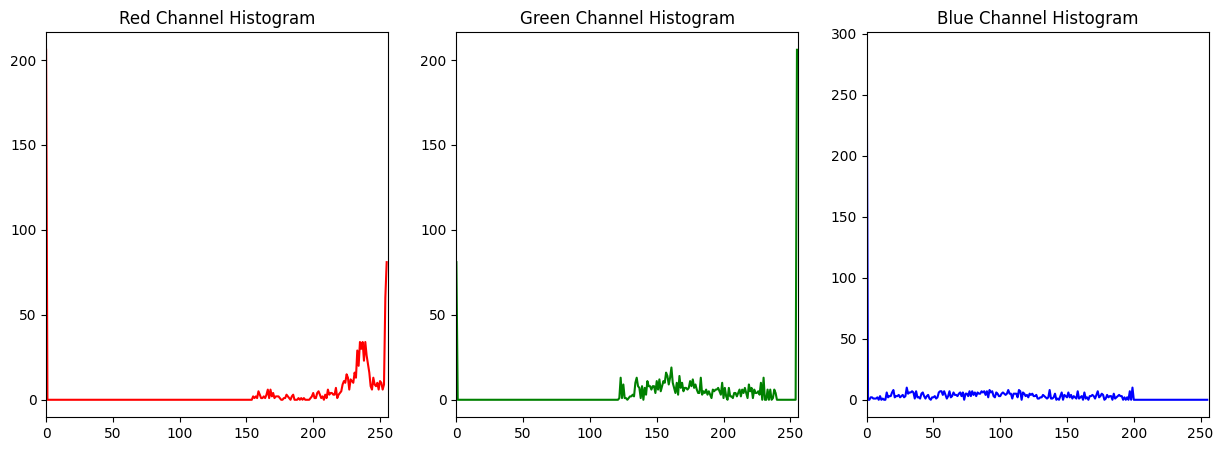


Object 13:
  Area: 408.5
  Perimeter: 147.15432798862457
  Bounding Box: (60, 69, 60, 16)
  Centroid: (89, 74)
  Mean Color (R, G, B): (159.11770833333333, 197.63854166666667, 79.09166666666667)


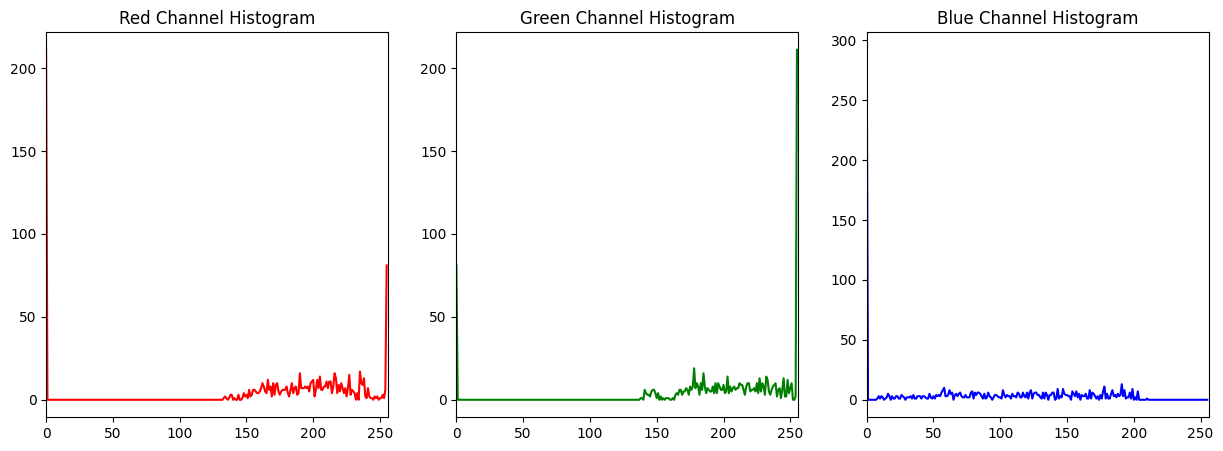


Object 14:
  Area: 361.0
  Perimeter: 99.94112491607666
  Bounding Box: (32, 49, 45, 13)
  Centroid: (52, 54)
  Mean Color (R, G, B): (180.6, 191.89743589743588, 91.3931623931624)


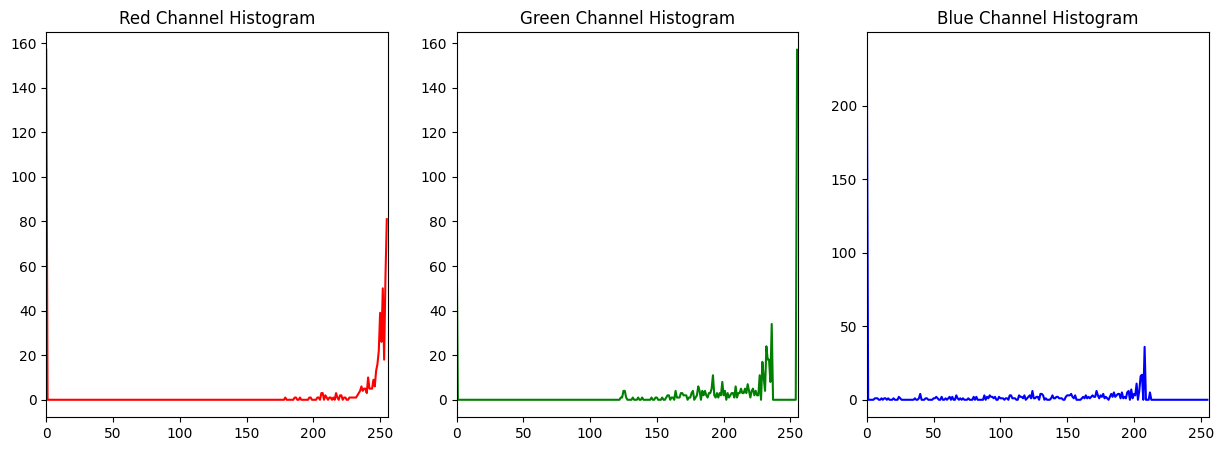


Object 15:
  Area: 462.5
  Perimeter: 150.81118202209473
  Bounding Box: (92, 45, 54, 16)
  Centroid: (117, 52)
  Mean Color (R, G, B): (169.60879629629628, 204.74652777777777, 94.04050925925925)


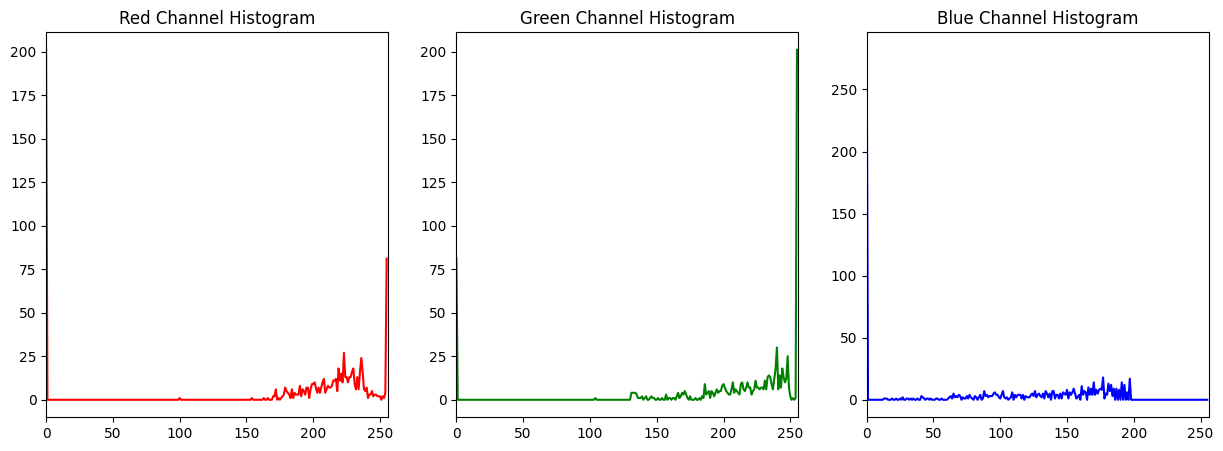


Object 16:
  Area: 14450.5
  Perimeter: 1178.8843386173248
  Bounding Box: (0, 0, 306, 110)
  Centroid: (182, 30)
  Mean Color (R, G, B): (195.13330362448008, 199.15068330362448, 113.52302436125966)


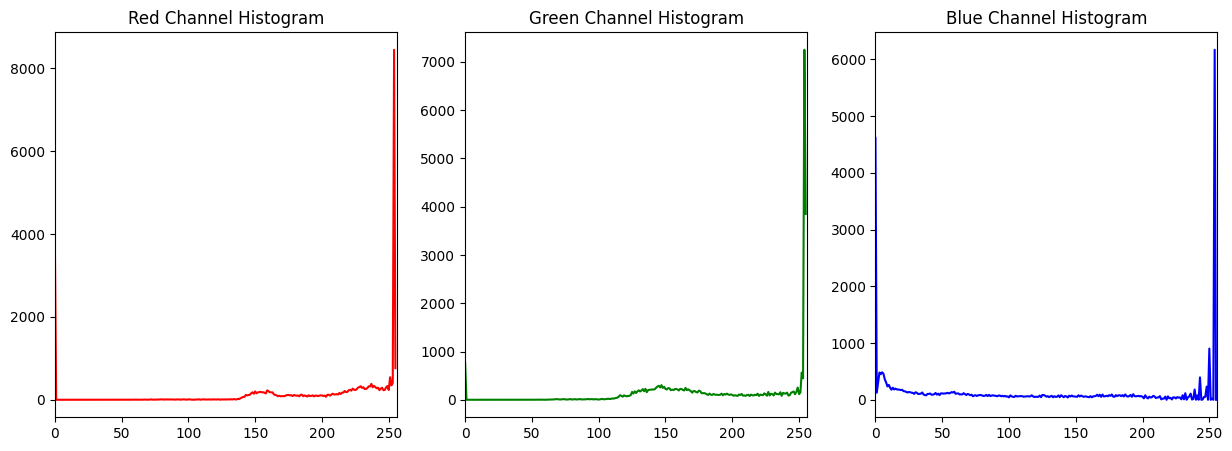

In [ ]:
# Display extracted features and histograms
for i, (area, perimeter, bbox, centroid, color, hist) in enumerate(zip(areas, perimeters, bounding_boxes, centroids, colors, histograms)):
    print(f"Object {i+1}:")
    print(f"  Area: {area}")
    print(f"  Perimeter: {perimeter}")
    print(f"  Bounding Box: {bbox}")
    print(f"  Centroid: {centroid}")
    print(f"  Mean Color (R, G, B): {color}")

    # Plot histograms
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.plot(hist[0], color='r')
    plt.title('Red Channel Histogram')
    plt.xlim([0, 256])

    plt.subplot(132)
    plt.plot(hist[1], color='g')
    plt.title('Green Channel Histogram')
    plt.xlim([0, 256])

    plt.subplot(133)
    plt.plot(hist[2], color='b')
    plt.title('Blue Channel Histogram')
    plt.xlim([0, 256])

    plt.show()
    print()